In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely import wkt
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/nmd/Projects/mlup/git-ufo-map')
from ufo_map.Utils.helpers import import_csv_w_wkt_to_gdf,save_csv_wkt,get_all_paths
CRS_UNI = 'EPSG:3035'

In [2]:
path_g = '/media/nmd/Krzrzrz/data-eubucco/Italy/piemonte/piemonte-gov-3035_geoms.csv'
path_a = '/media/nmd/Krzrzrz/data-eubucco/Italy/piemonte/piemonte-gov_attrib.csv'


In [3]:
gdf = import_csv_w_wkt_to_gdf(path_g,CRS_UNI)

In [4]:
gdf = pd.concat([gdf,pd.read_csv(path_a).drop(columns=['id'])],axis=1)

In [14]:
gdf.head()

,Unnamed: 0,id,geometry,height,type_source,type,age,floors,source_file
0,0,3bdf11ee-90a2-49ae-9e6b-48f26e4f20f4,"POLYGON ((4159057.450 2443028.148, 4159070.152...",4.0,1,NaN,NaN,NaN,piemonte_edifc
1,1,02a7057c-0df4-4feb-91da-f0a0cf8cc9ec,"POLYGON ((4158958.933 2443051.331, 4158969.224...",3.0,9,NaN,NaN,NaN,piemonte_edifc
2,2,f2bf161e-55d9-4c8f-a838-dda833e738a5,"POLYGON ((4158826.195 2444011.125, 4158826.144...",3.0,9,NaN,NaN,NaN,piemonte_edifc
3,3,6be2f757-5adb-4ac0-be0d-71ade9eb359e,"POLYGON ((4159085.699 2442890.248, 4159087.235...",6.0,1,NaN,NaN,NaN,piemonte_edifc
4,4,698dea6b-750b-47f9-8a2d-a22574577abe,"POLYGON ((4159187.248 2442378.007, 4159192.468...",5.0,1,NaN,NaN,NaN,piemonte_edifc


In [15]:
gdf2 = gdf.loc[gdf.duplicated(subset='id',keep=False)]

In [16]:
len(gdf2)

33436

<AxesSubplot:>

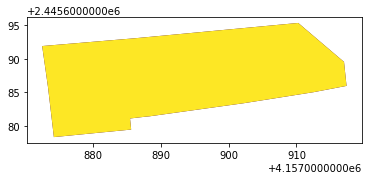

In [23]:
gdf2[gdf2.id=='4e473858-0fd2-4601-9999-34e5796b5f02'].plot(column='Unnamed: 0')

<AxesSubplot:>

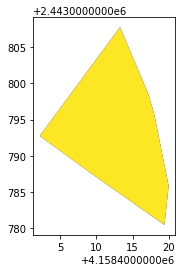

In [25]:
gdf2[gdf2.id=='369b90f4-476b-4810-9417-84d700699c0e'].plot(column='Unnamed: 0')

In [27]:
gdf2['area'] = gdf2.area

/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
len(gdf2)

33436

In [34]:
gdf2 = gdf2.drop_duplicates(subset=['id','area'])

In [35]:
gdf2

,Unnamed: 0,id,geometry,height,type_source,type,age,floors,source_file,area
59,59,4e473858-0fd2-4601-9999-34e5796b5f02,"POLYGON ((4157873.402 2445691.929, 4157886.045...",4.000,1,NaN,NaN,NaN,piemonte_edifc,490.900470
64,64,369b90f4-476b-4810-9417-84d700699c0e,"POLYGON ((4158402.186 2443792.742, 4158408.762...",5.000,1,NaN,NaN,NaN,piemonte_edifc,235.061134
483,483,15b20dcd-67f1-43fd-9e81-14f664a2103a,"POLYGON ((4166911.989 2448358.390, 4166913.186...",3.000,1,NaN,NaN,NaN,piemonte_edifc,13.676451
1016,1016,14b6db79-3c8b-434e-ba12-23dbc36f892f,"POLYGON ((4158426.862 2443750.709, 4158425.947...",5.000,1,NaN,NaN,NaN,piemonte_edifc,77.761597
1293,1293,b34eeed6-d352-486e-9a22-16eb31664bc0,"POLYGON ((4178656.550 2429625.445, 4178658.292...",5.042,1,NaN,NaN,NaN,piemonte_edifc,20.238230
...,...,...,...,...,...,...,...,...,...,...
2167156,2167156,08199a50-e6d4-11e6-bad0-68b599f40a28,"POLYGON ((4169327.708 2376853.983, 4169322.630...",6.481,91,NaN,NaN,NaN,piemonte_edifc,30.655068
2167158,2167158,0761666a-e6d4-11e6-bad0-68b599f40a28,"POLYGON ((4169340.094 2376871.774, 4169343.297...",4.204,91,NaN,NaN,NaN,piemonte_edifc,86.531657
2167159,2167159,0761666a-e6d4-11e6-bad0-68b599f40a28,"POLYGON ((4169334.831 2376860.477, 4169335.158...",1.619,91,NaN,NaN,NaN,piemonte_edifc,27.736202
2167162,2167162,f7520dd5-c087-4d4b-944b-dd903717de21,"POLYGON ((4117221.110 2358410.338, 4117210.222...",7.702,1,NaN,NaN,NaN,piemonte_edifc,131.211041


In [39]:
gdf2[gdf2.id=='0761666a-e6d4-11e6-bad0-68b599f40a28'].dissolve()

,geometry,Unnamed: 0,id,height,type_source,type,age,floors,source_file,area
0,"POLYGON ((4169335.158 2376859.745, 4169335.685...",2167158,0761666a-e6d4-11e6-bad0-68b599f40a28,4.204,91,NaN,NaN,NaN,piemonte_edifc,86.531657


In [44]:
gdf2[gdf2.id=='b34eeed6-d352-486e-9a22-16eb31664bc0']

,Unnamed: 0,id,geometry,height,type_source,type,age,floors,source_file,area
1293,1293,b34eeed6-d352-486e-9a22-16eb31664bc0,"POLYGON ((4178656.550 2429625.445, 4178658.292...",5.042,1,NaN,NaN,NaN,piemonte_edifc,20.238230
1294,1294,b34eeed6-d352-486e-9a22-16eb31664bc0,"POLYGON ((4178652.825 2429616.384, 4178652.918...",6.187,1,NaN,NaN,NaN,piemonte_edifc,277.977173
1295,1295,b34eeed6-d352-486e-9a22-16eb31664bc0,"POLYGON ((4178661.590 2429595.682, 4178661.634...",5.227,1,NaN,NaN,NaN,piemonte_edifc,21.108977


## Run

In [5]:
gdf = gdf.sort_values(by='height')

In [6]:
gdf = gdf.dissolve(by='id')

In [7]:
gdf = gdf.drop(columns=['Unnamed: 0'])

In [11]:
gdf['id'] = gdf.index

In [13]:
gdf.head()

,geometry,height,type_source,type,age,floors,source_file,id
id,,,,,,,,
00000b20-90c8-4b55-9a0a-20a375a1fb7d,"POLYGON ((4153638.588 2340966.283, 4153638.728...",5.0,1,NaN,NaN,NaN,piemonte_edifc,00000b20-90c8-4b55-9a0a-20a375a1fb7d
00000ef0-3ef5-433b-b809-2e138706013e,"POLYGON ((4067416.567 2444178.093, 4067416.635...",5.0,101,NaN,NaN,NaN,piemonte_edifc,00000ef0-3ef5-433b-b809-2e138706013e
000010ff-6cdb-46ab-b672-1bd371a62ebb,"POLYGON ((4117090.586 2427329.851, 4117093.005...",7.0,1,NaN,NaN,NaN,piemonte_edifc,000010ff-6cdb-46ab-b672-1bd371a62ebb
0000182e-2c95-4a42-878d-505ee9aa15c9,"POLYGON ((4107482.903 2408225.904, 4107478.837...",4.0,1,NaN,NaN,NaN,piemonte_edifc,0000182e-2c95-4a42-878d-505ee9aa15c9
00001cd5-1412-4b5f-91ac-5ef48e55606c,"POLYGON ((4140423.754 2430110.120, 4140425.538...",5.0,1,NaN,NaN,NaN,piemonte_edifc,00001cd5-1412-4b5f-91ac-5ef48e55606c


In [14]:
save_csv_wkt(gdf[['id','geometry']],'/media/nmd/Krzrzrz/data-eubucco/Italy/piemonte/piemonte-gov-3035_geoms_clean.csv')


/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [15]:
gdf.drop(columns=['geometry']).to_csv('/media/nmd/Krzrzrz/data-eubucco/Italy/piemonte/piemonte-gov-attrib_clean.csv',index=False)